## An exploration of the automobile data

In [1]:
# Importing the required packages for adata analysis
import numpy as np
np.random.seed(seed=30)


import pandas as pd
import seaborn as sns
import ast, json
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.preprocessing import minmax_scaling
import missingno

### Reading in the data and viewing the first 5 entries.

In [2]:
# reading in the data from the automobile.txt file and taking a look at the top 5 entries.
df = pd.read_csv('automobile.txt',sep=',')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Frame basic info

In [3]:
# judging by the head of this dataset it would appear that a ? has been used to populate unknown values.
# this my have casued other issues throughout so i will have a quick look at data types to see 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

The above table does suggest some issues, for example price has been determined as an object and not a float, where as you would imagine that if all values where numerical then Pandas would interpret the column as a float. This suggest then that some entries are of another type. Perhaps string type, perhaps '?'.
In order to rule this out I will reload the data set and instruct pandas to replace any '?' with NaN values. Also Im not hapy with the column names containing dashes so I will change them all to underscores right away.

## Data Cleaning

#### Re load the data set with conditions that create a more usible data frame

In [4]:
# make sure all ? are changed to NaN values
df = pd.read_csv('automobile.txt',sep=',', na_values = '?',)
# Replace all - with _
df.columns = df.columns.str.replace("-", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

As you can see this has changed quite a number of the datatypes, all of which seem more appropriate and also notice that alot of Null value counts have changed indicating that the '?' was used thoughout the data set.<br><br>
To further improve this data set, number of doors needs to be converted to a int datatype in order to be of any use. As does number of cylinders.

#### View missing data

<AxesSubplot: >

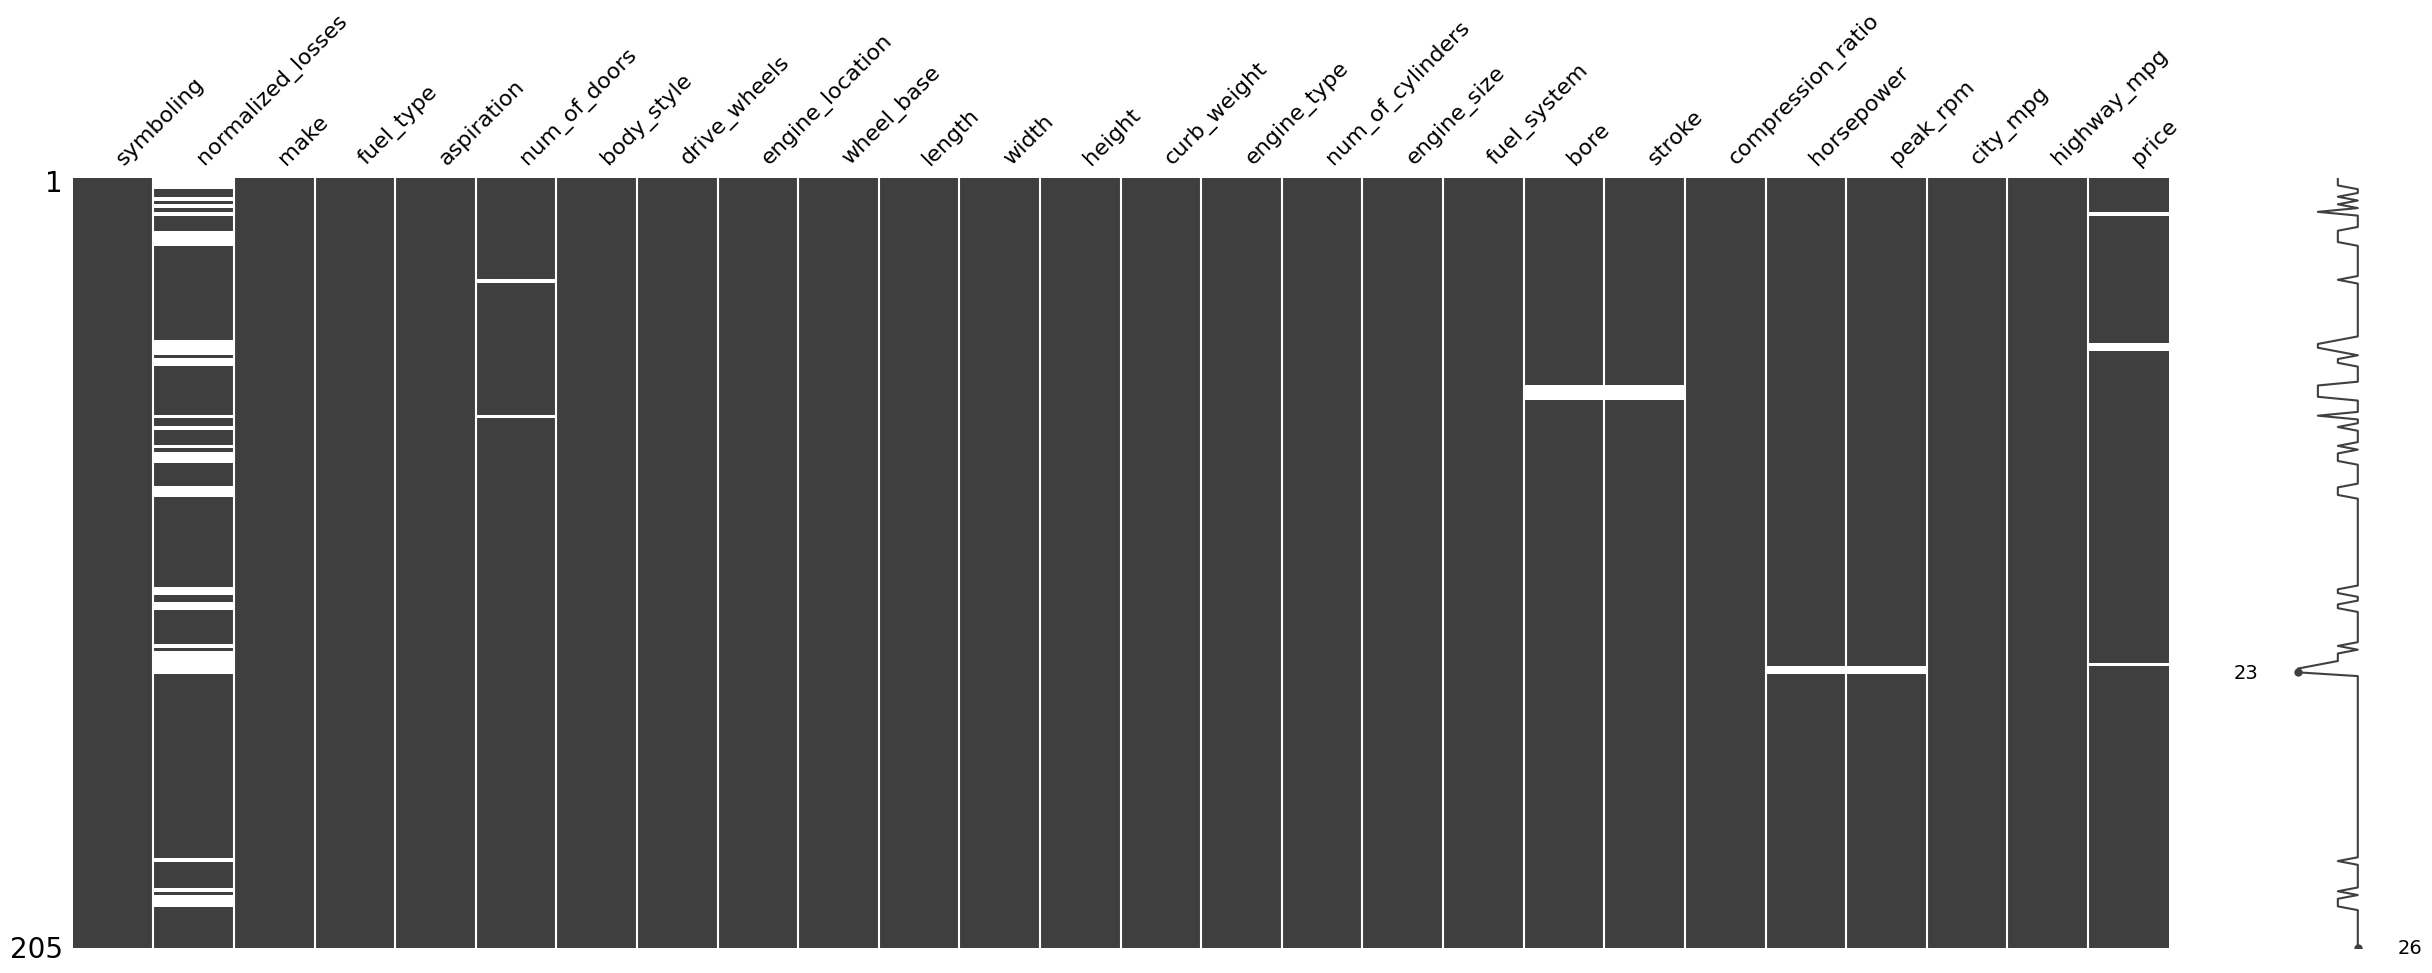

In [5]:
# quick visualisation of where the data is missing
missingno.matrix(df, figsize = (30,10))

In [6]:
# check how much of the normalised losses column is actually missing.
missing_values_count = df['normalized_losses'].isnull().sum()
total_cells = np.product(df['normalized_losses'].shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

20.0

This shows that 20% of the total data for the normalized-losses column is missing. This is too much to ignore for this analysis so I will start by removing this column alltogether and then seeing what percentage of data is missing after that.

In [7]:
df.drop(['normalized_losses'],inplace=True, axis=1)

In [8]:
# check how much of the total data is now missing missing.
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.351219512195122

Now we can see that over the whole dataset 0.3% of the data is missing. This is perfectly acceptible and in order to make sure I have a complete data set I have chosen to remove all entries with a NaN value. Had the data set given the model as well as the manufacture, this information would be available online however to spend time saving 0.3% of the data vs the contribution it would have to any findings does not seem reasonible for this purpose. 

In [9]:
df.dropna(inplace = True)

#### Ensure columns are of correct data type 

Next I will ensure the number of doors and number of cylinder columns are of usible data type. 

In [10]:
# Iterate thrgouh the rows in the dataframe and change the strings for int
for i, row in df.iterrows():
    if row['num_of_doors'] == 'two':
        df.at[i,'num_of_doors']= 2
    # using elif instead of else stops the function accidentally changing 2 to 4 if ran twice.
    elif row['num_of_doors'] == 'four':
        df.at[i,'num_of_doors']= 4

In [11]:
# find the number of unique values held in num-of-cylinders, in preparation for doing the same as above
df['num_of_cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [12]:
# iterate throguh rows and change str to int values. 
for i, row in df.iterrows():
    if row['num_of_cylinders'] == 'three':
        df.at[i,'num_of_cylinders']= 3
    elif row['num_of_cylinders'] == 'four':
        df.at[i,'num_of_cylinders']= 4
    elif row['num_of_cylinders'] == 'five':
        df.at[i,'num_of_cylinders']= 5
    elif row['num_of_cylinders'] == 'six':
        df.at[i,'num_of_cylinders']= 6
    elif row['num_of_cylinders'] == 'eight':
        df.at[i,'num_of_cylinders']= 8
    elif row['num_of_cylinders'] == 'twelve':
        df.at[i,'num_of_cylinders']= 12

In [13]:
# These two columns can now be converted to int type, making them more useful.
df = df.astype({'num_of_doors':'int'})
df = df.astype({'num_of_cylinders':'int'})
print(df.dtypes)

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


### Numerical Data Overview

In [14]:
# I will assemble a DataFrame of only the numerical data types from the dataframe to have a quick look if there are
# any stand out relationships stright off...

numerical_df =  pd.DataFrame({
    'symboling': df['symboling'],
    'num_of_doors': df['num_of_doors'],
    'wheel_base': df['wheel_base'],
    'length': df['length'],
    'width': df['width'],
    'height' : df['height'],
    'curb_weight' : df['curb_weight'],
    'num_of_cylinders' : df['num_of_cylinders'],
    'engine_size' : df['engine_size'],
    'bore' : df['bore'],
    'stroke': df['stroke'],
    'compression_ratio' : df['compression_ratio'],
    'horsepower' : df['horsepower'],
    'peak_rpm' : df['peak_rpm'],
    'city_mpg' : df['city_mpg'],
    'highway_mpg' : df['highway_mpg'],
    'price' : df['price'],})

scaled_data = minmax_scaling(numerical_df, columns = [
    'symboling',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price',])

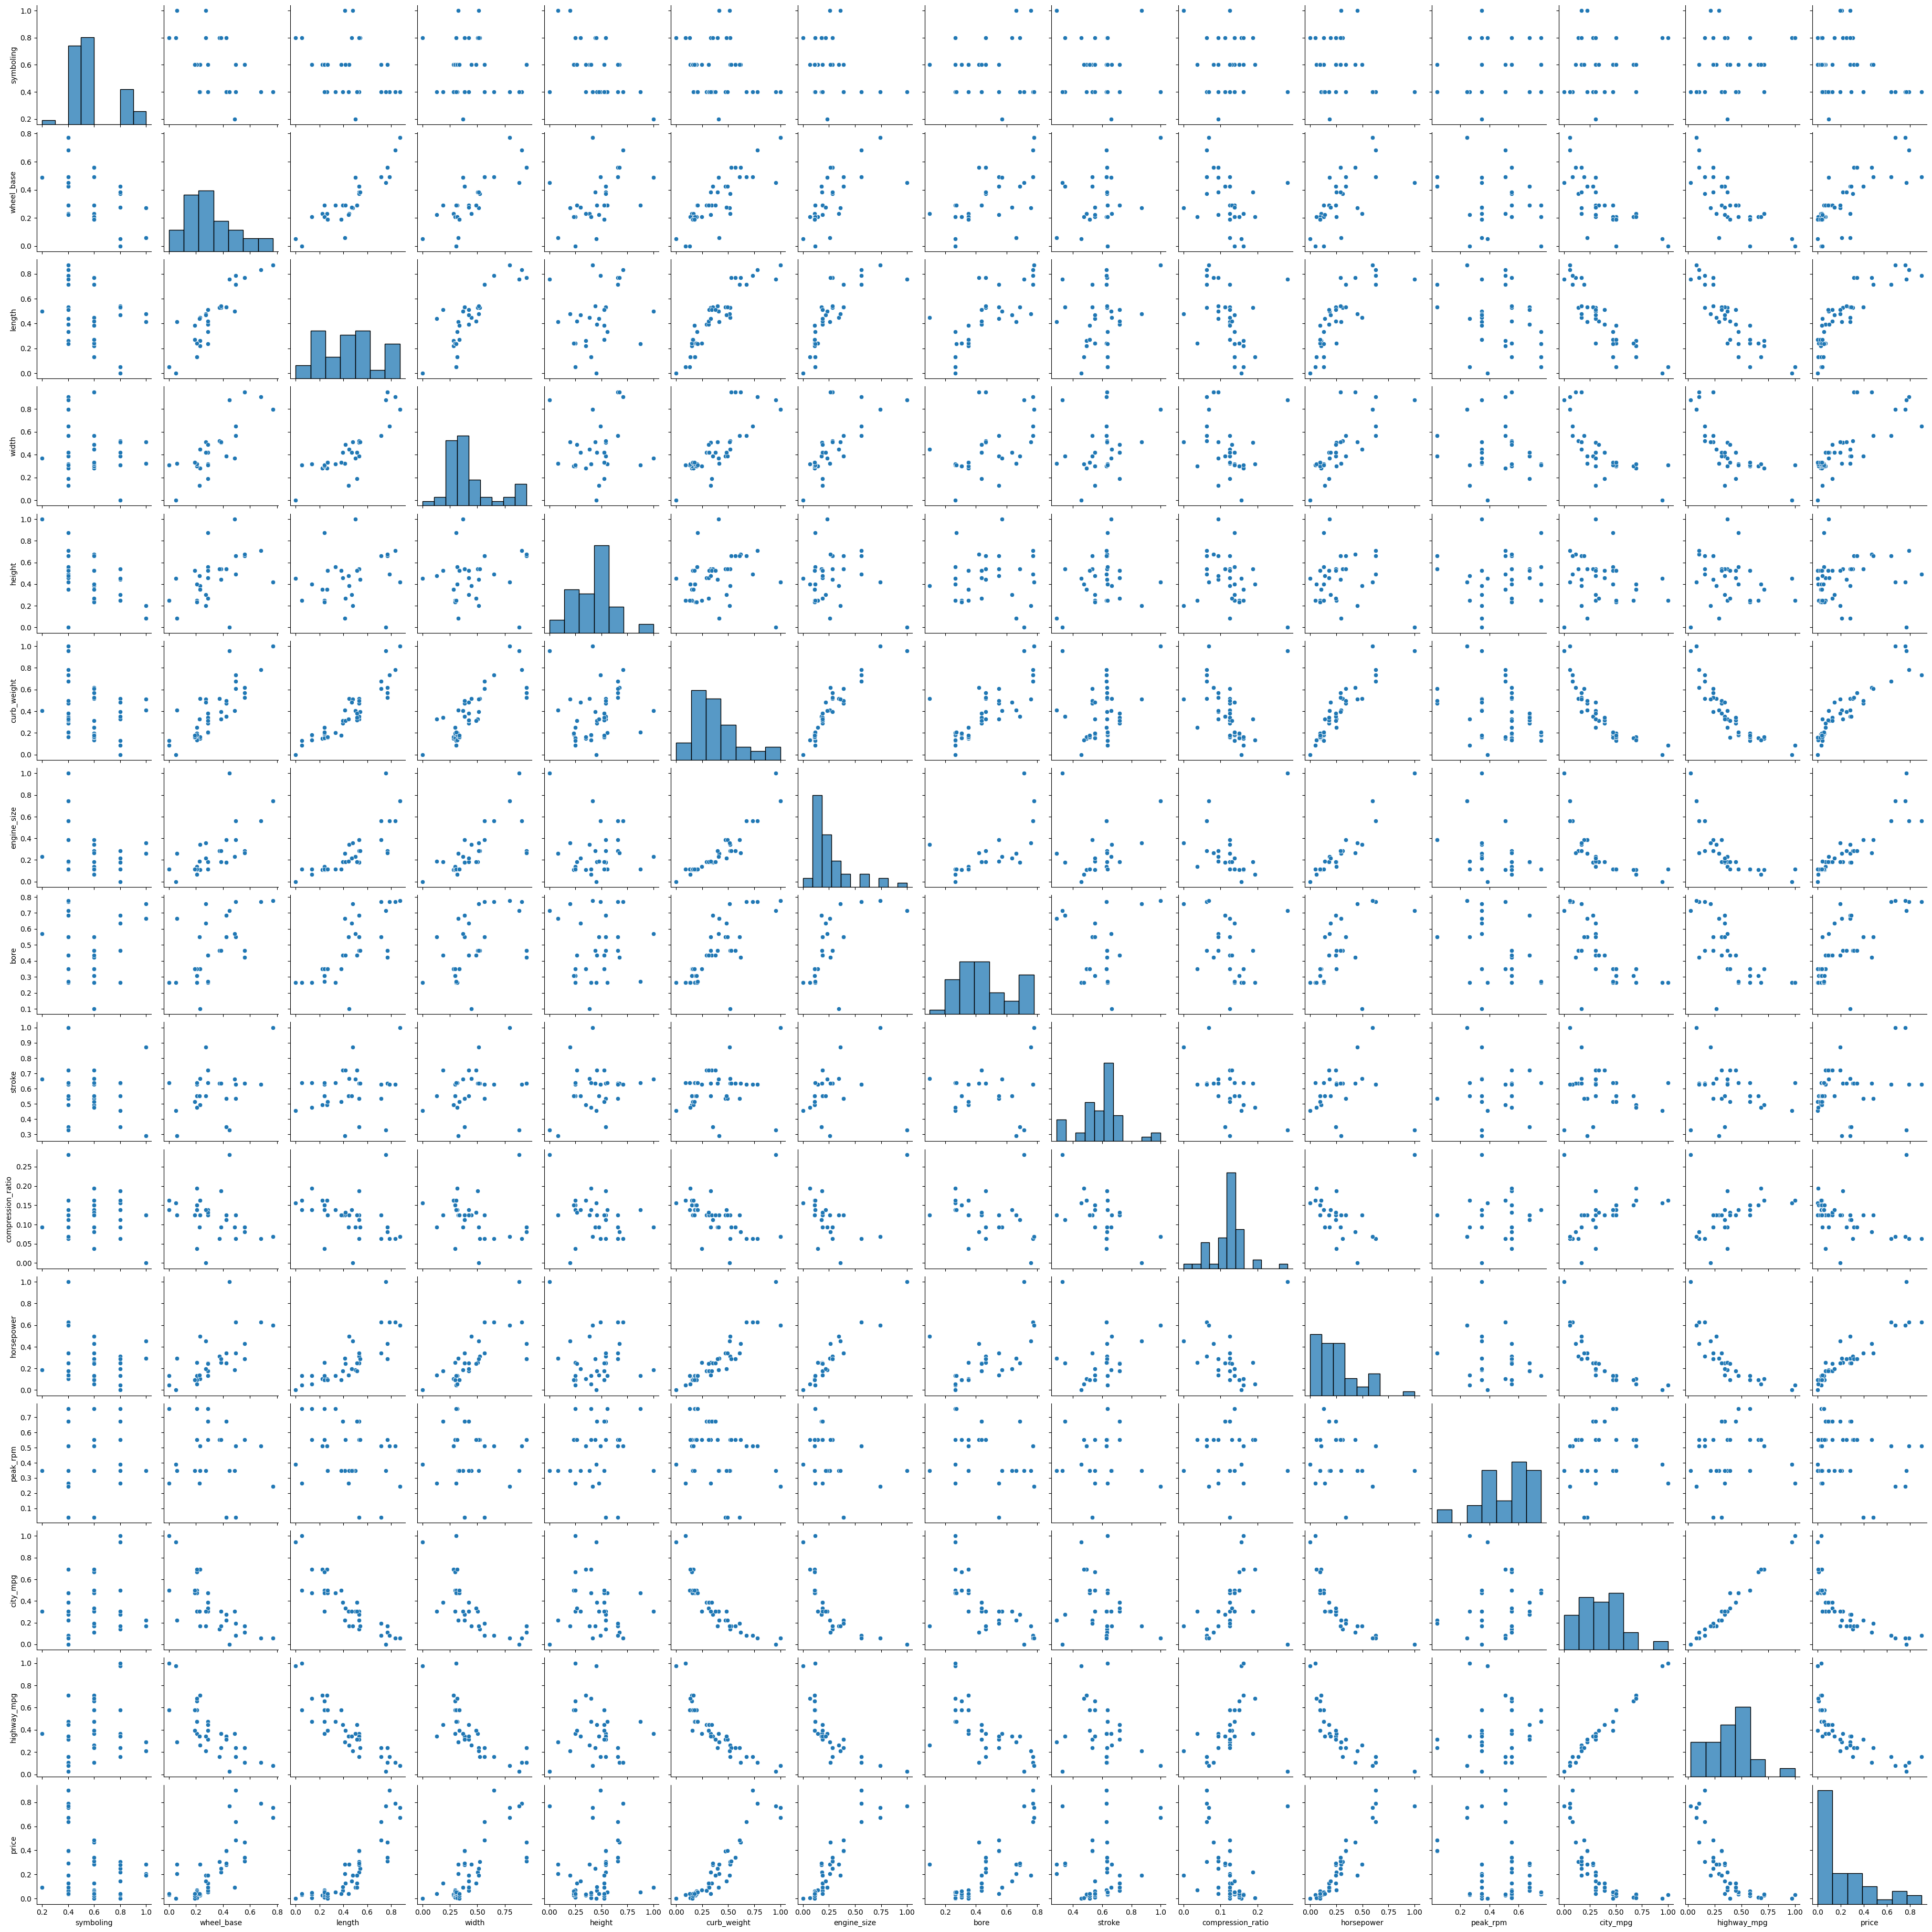

In [15]:
# plot a matrix plot for first 50 rows, only the numerical data to see if there are any stand out comparisons. 
sns.pairplot(scaled_data[0:50])
# this takes a moment, comment out and run all cells again to ignore. 

Although you might need a magnifying glass to see the labels, we can see from this matrix there are quite a number of trends to explore should we wish to, yet also quite a few comparisons that seemingly have no influence on one another what so ever, however first of all I'd like to also see some basic averages based on specfic criteria.

# My first enquiry will be about value. 
## When considering a purchase with value for money in mind, what companies deserve your attention. 

#### To begin with lets figure out what the most popular vehicle type of vehicle is on the market today.

I will start by exploring some very basic ideas to gain an insight into populartiy, starting with manufacture and body shape.

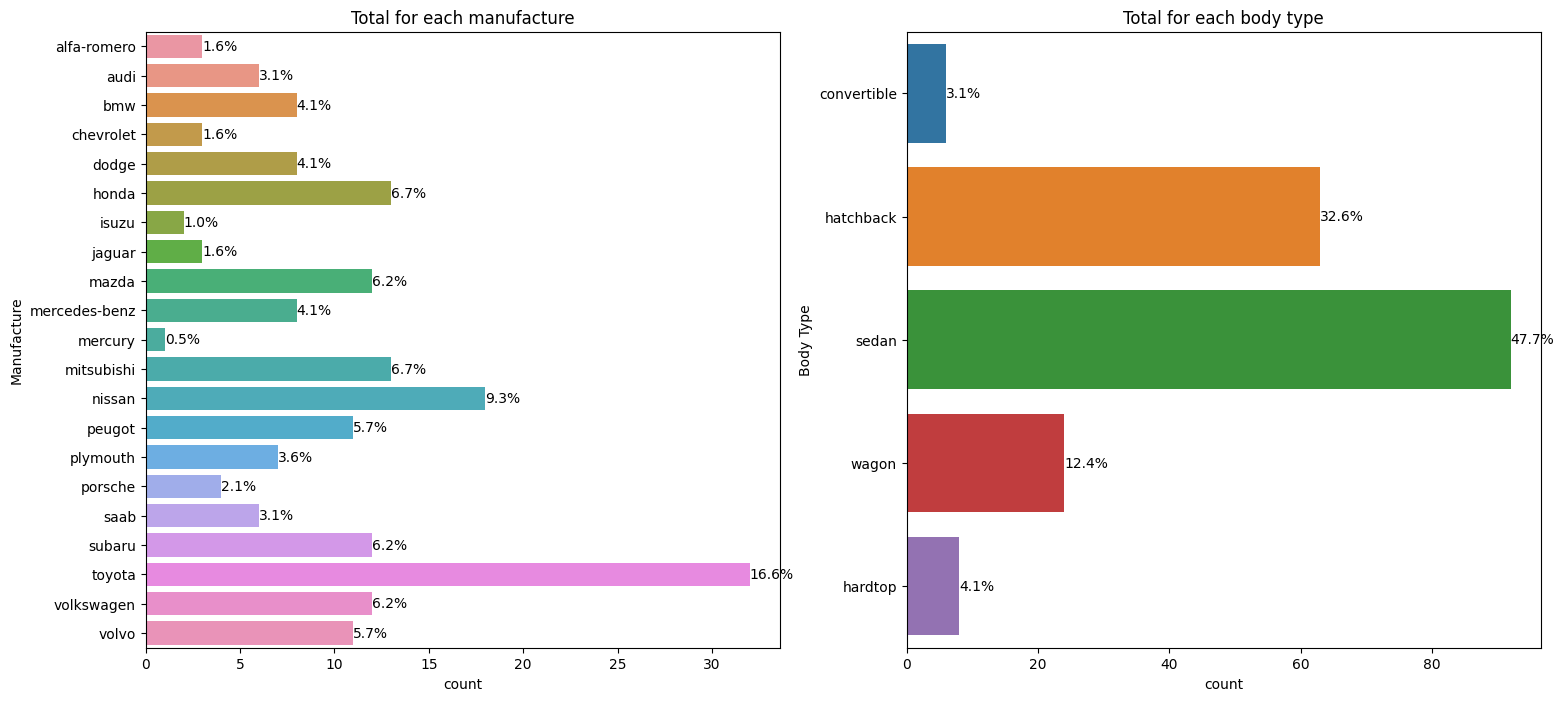

In [16]:
# set size and total amount of subplots
fig, ax=plt.subplots(1,2,figsize= (18, 8))

# create the first subplot
manufacture_count = sns.countplot(y="make", data = df, ax=ax[0])
manufacture_count.set(ylabel='Manufacture', title='Total for each manufacture')

# add annotations - percentage
for c in manufacture_count.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df.make.count()*100:0.1f}%' if (h := v.get_width()) > 0 else '' for v in c]
    manufacture_count.bar_label(c, labels=labels, label_type='edge')
    
# create the second subplot
body_type_count = sns.countplot(y="body_style", data = df, ax=ax[1])
body_type_count.set(ylabel='Body Type', title='Total for each body type')

# add annotations - percentage
for c in body_type_count.containers:    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/df.body_style.count()*100:0.1f}%' if (h := v.get_width()) > 0 else '' for v in c]
    body_type_count.bar_label(c, labels=labels, label_type='edge')


As can be seen from these two graphs above the most popular body type is a sedan and the most popular manufacture is Toyota. In fact Japanese manaufactures over all have a considerable share of the market with regards to this particular data set. I will add one more factor into this enquiry before making an general assumption.

[Text(0, 0.5, 'Amount of doors'), Text(0.5, 1.0, 'Totals based on door count')]

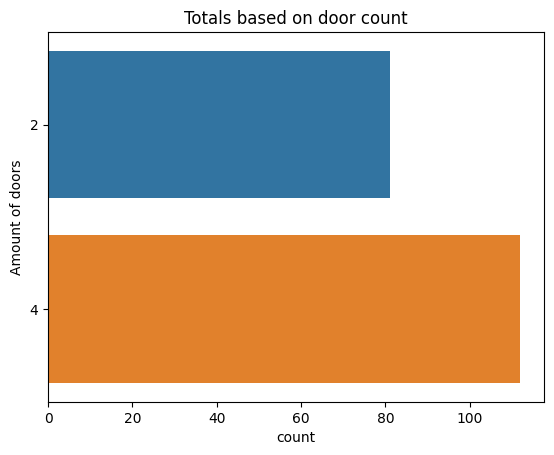

In [17]:
# most popular door configuration.
door_count = sns.countplot(y="num_of_doors", data = df)
door_count.set(ylabel='Amount of doors', title='Totals based on door count')

Although there isnt a great deal separating the two catagories for amount of doors, four door vehicles are still more common by this data set. I would conclude from this brief look into the data that the most common vehicle in this data set is a Japanese manufactured, four door sedan. <br><br>
Toyota is quite clearly the most common manufacture with its closest rival being another Japansese brand Nissan who's total is only 56% of Toyotas total within the data set.

## Which body style are manufacturers producing the most of.

In [18]:
# Finding the mode body astyle for each manufacture
mode_body_style = df.groupby(['make'], as_index = False).agg(pd.Series.mode)
print(mode_body_style[['make', 'body_style']])

             make          body_style
0     alfa-romero         convertible
1            audi               sedan
2             bmw               sedan
3       chevrolet           hatchback
4           dodge           hatchback
5           honda           hatchback
6           isuzu  [hatchback, sedan]
7          jaguar               sedan
8           mazda  [hatchback, sedan]
9   mercedes-benz               sedan
10        mercury           hatchback
11     mitsubishi           hatchback
12         nissan               sedan
13         peugot               sedan
14       plymouth           hatchback
15        porsche             hardtop
16           saab  [hatchback, sedan]
17         subaru               sedan
18         toyota           hatchback
19     volkswagen               sedan
20          volvo               sedan


Interestingly the most common vehicle type accross the dataset was a sedan, however Toyota's most common vehicle type is hatchbatch, Which would indicate that it is not body style alone that determines a companies share of the market. 

## Size vs combined_mpg

Im interested to make a comparison of a vehicles size vs its average mpg to figure out who is offereing the best utility per mile from a vehicle. <br><br>
I will start adding a column to the data frame that gives the size of the footprint of each vehicle. This gives us a rough idea of how large the car is which would bear an indication as to how much usible space
there is in the vehicle. Obviously body-shape has an influence on this metric but as a rough idea one might 
assume based on general knowledge of cars that around 60-70% of a hatchback/sedan is space for passengers and cargo, with the other 30-40% being the engine bay, etc.<br>
Following this I will add a column for combinded_mpg by adding city_mpg and Highway_mpg and deviding by 2.

In [19]:
df["footprint_area"] = np.nan
# populate the column with zeros and make sure it is of integer data type
df['footprint_area'] = df['footprint_area'].fillna(0)
df = df.astype({'footprint_area':'float'})

# iterate throguht he rows and populate the profits cilumn with accurate data 
# revenue - budget = profit
for i, row in df.iterrows():
    area = (row.length)*(row.width)
    df.at[i,'footprint_area']= area

In [20]:
df["combined_mpg"] = np.nan
# populate the column with zeros and make sure it is of integer data type
df['combined_mpg'] = df['combined_mpg'].fillna(0)
df = df.astype({'combined_mpg':'float'})

# iterate through the rows and populate the combined_mpg column 
# combined_mpg = city_mpg + highway_mpg /2
for i, row in df.iterrows():
    combined_mpg = ((row.city_mpg)+(row.highway_mpg))/2
    df.at[i,'combined_mpg']= combined_mpg
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,footprint_area,combined_mpg
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,10820.08,24.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,10820.08,24.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,11213.60,22.5
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,11690.92,27.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,11726.24,20.0


In [32]:
# create a new data frame with required columns
mpg_size_df =  pd.DataFrame({
    'make': df['make'],
    'footprint_area': df['footprint_area'],
    'combined_mpg': df['combined_mpg'],
})

# group the vehciles by manufacture and get a table with the mean averages for numerical values.
mpg_size_df = mpg_size_df.groupby(by=['make'],as_index=True)
mpg_size_df = round(mpg_size_df.mean(),0)
mpg_size_df

,footprint_area,combined_mpg
make,,
alfa-romero,10951.0,24.0
audi,12741.0,22.0
bmw,12280.0,22.0
chevrolet,9508.0,44.0
dodge,10372.0,32.0
honda,10355.0,33.0
isuzu,10901.0,26.0
jaguar,13773.0,16.0
mazda,11193.0,31.0


In [22]:
#sort the table by combined_mpg
mpg_size_df.sort_values(by='combined_mpg',ascending=False, inplace = True)
# scale the data to aid in visualisation
mpg_size_df = minmax_scaling(mpg_size_df, columns = ['footprint_area','combined_mpg'])

### Now That I have a scaled and prepared tabel of usefuldata I will make a plot that shows vehicles footprint vs combined_mpg

In [23]:
# Reset the index so that it can be used for plotting
mpg_size_df.reset_index(inplace=True)
# remove the top and the bottom points for the sake of any extreme outliers 
mpg_size_df.drop([0,20],axis=0, inplace=True)

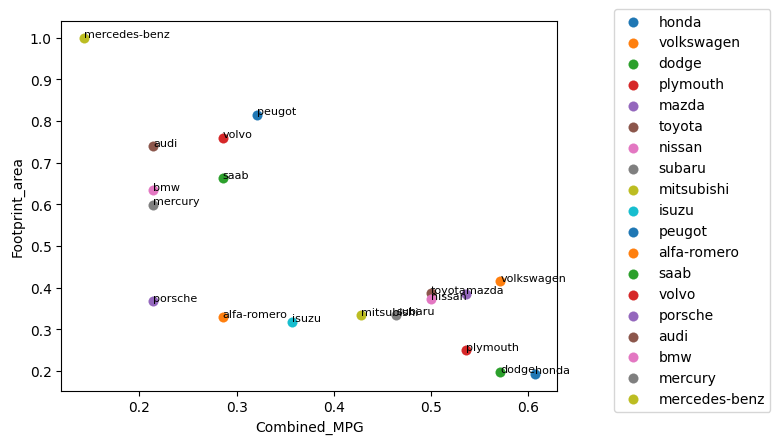

In [24]:
# prepare subplots
fig, ax = plt.subplots()

# iterate thrgouh the rows of the mpg_size_df dataframe and create plot points for the sactter diagram
for i, row in mpg_size_df.iterrows():
    x = mpg_size_df['combined_mpg'][i]  # combined_mpg = x
    y = mpg_size_df['footprint_area'][i]  # footprint_area = y
    l = mpg_size_df['make'][i]  # make creates the label

    # annotate each point with the make
    ax.annotate(mpg_size_df['make'][i], (x,y), fontsize= 8)
    # add each point to the graph
    ax.scatter(x, y, label=l, s=50, linewidth=0.1)

    
# add labels and legend
ax.set_xlabel("Combined_MPG")
ax.set_ylabel("Footprint_area")
ax.legend(bbox_to_anchor=(1.1, 1.05))

# plot graph
plt.show()



When considering practical factors that influence the decision when purchasing a vehicle, such as ease to drive, ease to park, hauling capicity etc, and pitching them against over all economy of ownership, I would suggest that toyota, mazda, nissan and Volkswagon are the better options when considering a user friendly everyday vehicle.<br>
As the company with the largest collection of cars in the data set, generally speaking Toyota do not make the largest vehicles on average, but their size to MPG ratio, when both are important, is only trumped by Volkswagon. (If above average fuel economy is considered a priorty eg: 0.5 and above, then the only other vehicle larger than the Toyota is the volkwagon.)
<br>
This means then that owning a Volkswagon, in comparison to most other vehicles, you can move more people and more cargo for much less when it comes to fuel costs.
This is interesting considering as we've seen that Volkswagon only contributes 6.2% of the market.
<br>
It might be wise then to consider the initial outlay when shopping for a vehicle to see where Toyata sits within the market and whether it has any influence on the value and therefore popularity over Volkwagon when it comes to over all range and market share.<br>
Firstly though Id like to observe whether driving habits might have any influence. 

## Would driving habbits dictate purchasing decisions.

As we've seen above, the average combined mpg of a Volkswagon, when compared to practicality in terms of size, seems to be more appealing than the majority of other manufactures however, could driving habits have an influence on the decision making process? 

In [25]:
city_vs_highway_df =  pd.DataFrame({
    'make': df['make'],
    'city_mpg': df['city_mpg'],
    'highway_mpg': df['highway_mpg'],
})
# group the vehciles by manufacture and get a table with the mean averages for numerical values
city_vs_highway_df = city_vs_highway_df.groupby(by=['make'],as_index=True)
city_vs_highway_df = round(city_vs_highway_df.mean(),0)
city_vs_highway_df.head()

,city_mpg,highway_mpg
make,,
alfa-romero,20.0,27.0
audi,19.0,24.0
bmw,19.0,25.0
chevrolet,41.0,46.0
dodge,28.0,35.0


[Text(0, 0.5, 'Manufacture'), Text(0.5, 1.0, 'Average Highway MPG')]

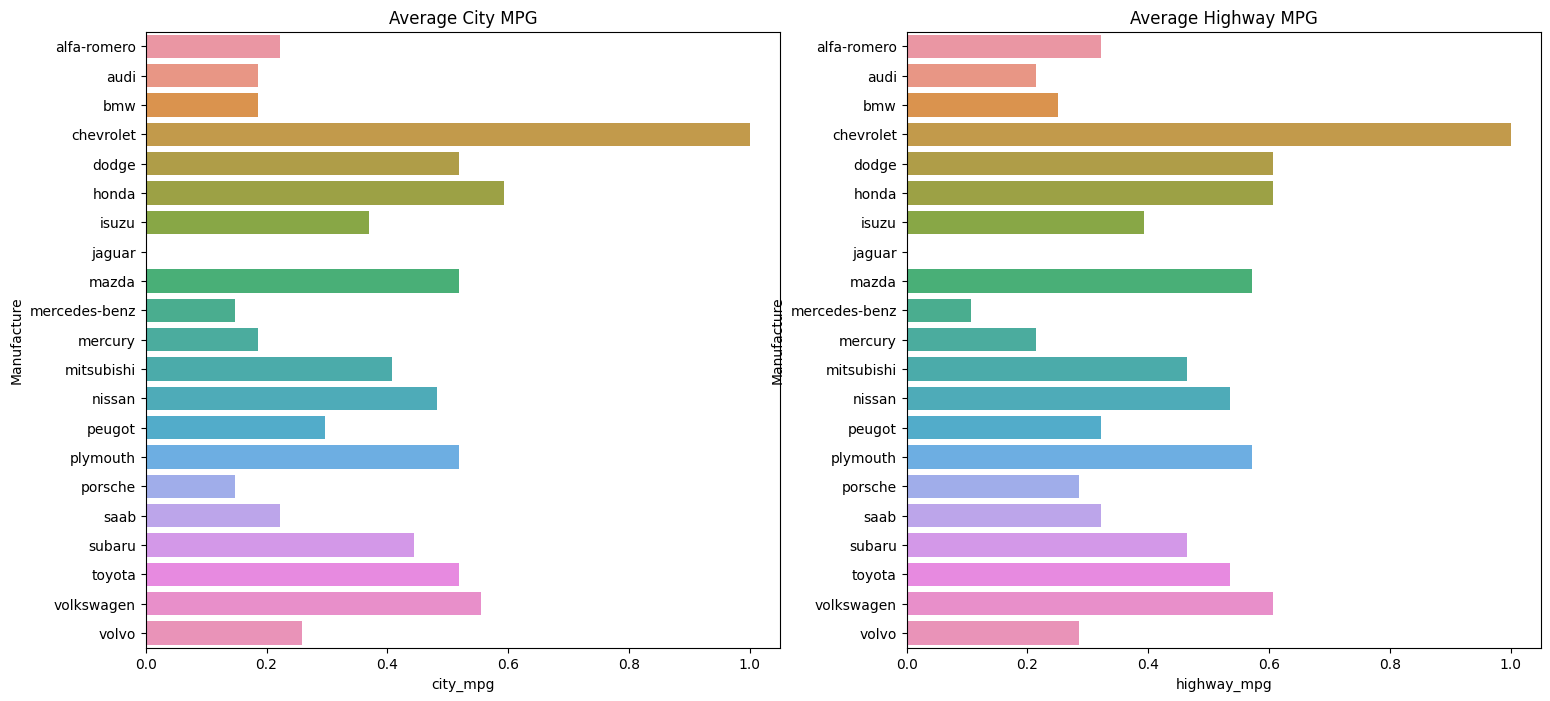

In [26]:
# scale the data to aid in visualisation
city_vs_highway_df = minmax_scaling(city_vs_highway_df, columns = ['city_mpg','highway_mpg'])
city_vs_highway_df

# Reset the index so that it can be used for plotting
city_vs_highway_df.reset_index(inplace=True)
city_vs_highway_df.head()


fig, ax=plt.subplots(1,2,figsize= (18, 8))
# create the first subplot
city_mpg = sns.barplot(data=city_vs_highway_df, x= 'city_mpg', y= 'make',ax=ax[0])
city_mpg.set(ylabel='Manufacture', title='Average City MPG')
# create the second subplot
highway_mpg = sns.barplot(data=city_vs_highway_df, x= 'highway_mpg', y= 'make', ax=ax[1])
highway_mpg.set(ylabel='Manufacture', title='Average Highway MPG')

The graph above compares the average city_mpg and highway_mpg. The idea being that perhaps a commuter with a drive consisting of majorty highway miles, would choose a differnet vehicle to someone who's driving mostly kept them in urban environments. However, Volkwagons still seems to be the better vehicle in both catagories. Volkwagons only rivals being Honda and Dodge (and Chevrolet however I consider this an outlier) when it comes to MPG however in a more previous graph we saw that the average Honda or Dogne is nearly 50% smaller than the average volkwagon. so if moving a family or a large cargo is the name of the game then Volkswagon still provides the most value. 

### Now I will consider purchase cost to see if Volkswagon really is the most value for money vehicle.

In [27]:
price_by_manufacture_df =  pd.DataFrame({
    'make': df['make'],
    'price': df['price'],
})
price_by_manufacture_df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [28]:
print(price_by_manufacture_df['price'].min())
print(price_by_manufacture_df['price'].max())

5118.0
45400.0


# Firstly lets get a general overview of pricing and how its spread accross the range. 

To do this I will create a bin and group the vehicles into pricing groups.

[Text(0.5, 1.0, 'Vehicles by price range')]

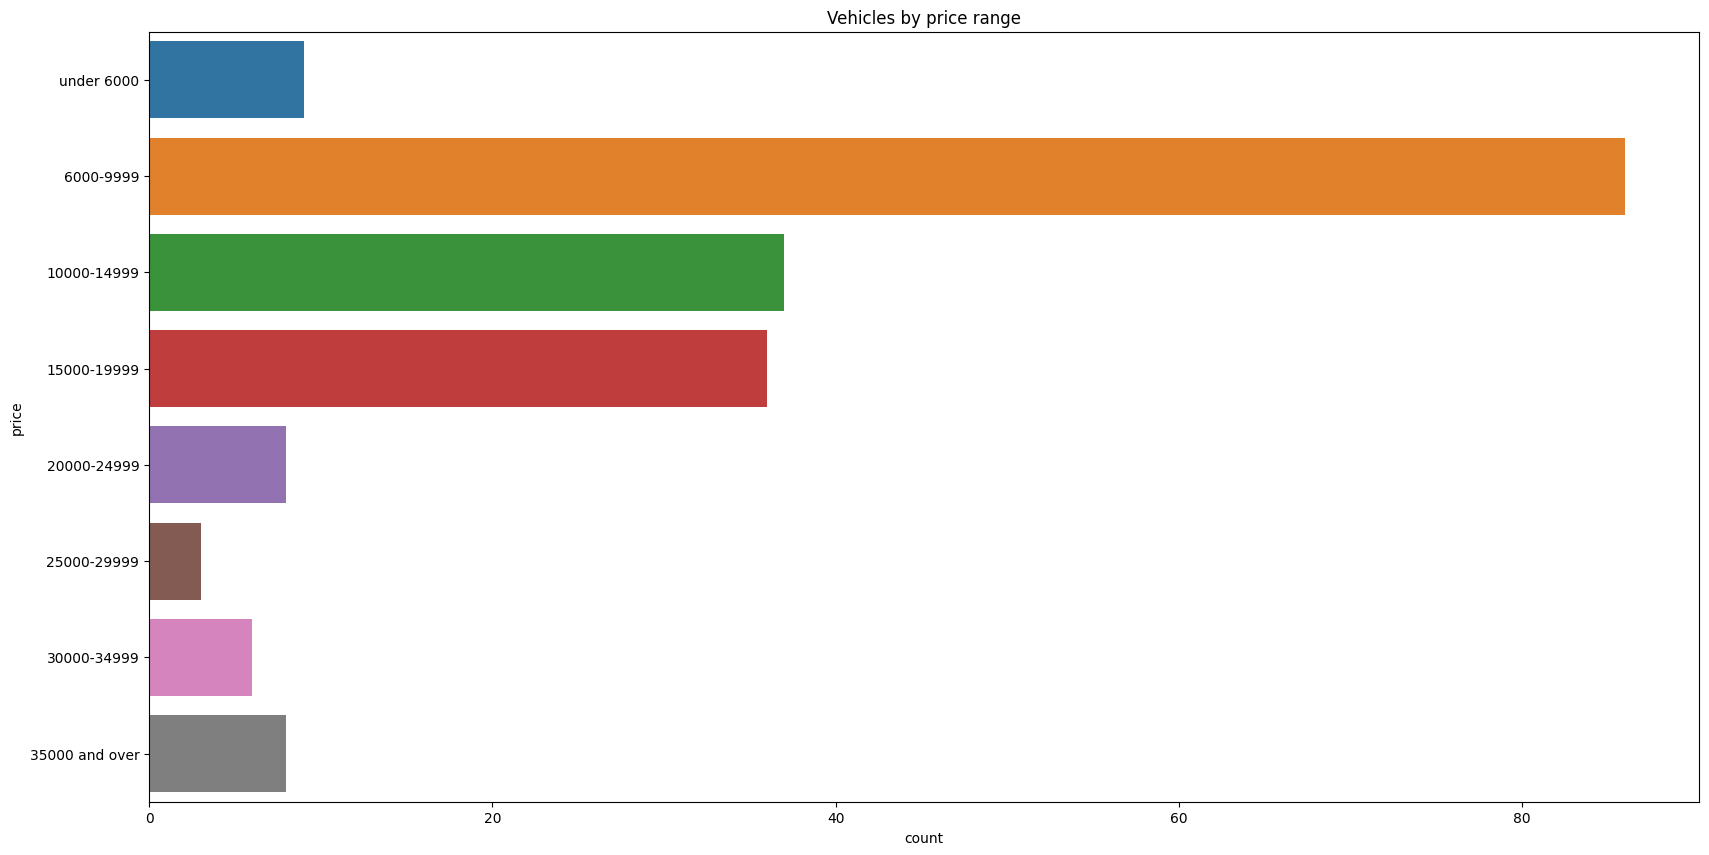

In [29]:
# create a separate copy of the database
df_price_bin = price_by_manufacture_df
# cut the price column into groups
df_price_bin['price'] = pd.cut(df_price_bin['price'], [5000,6000,9999,14999,19999,24999,29999,34999,50000], 
                   labels=['under 6000', '6000-9999', '10000-14999','15000-19999','20000-24999','25000-29999','30000-34999',
                           '35000 and over'])
# plot a graph
fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_price_bin['price'], data=df_price_bin).set(title='Vehicles by price range')


We can see from this graph that the most common price range for a vehicle from this dataset is between six and ten thousand pounds. <br>
It would be interesting to see who is dominating that area, I will do so by plotting a histogram with price by manufacture. 

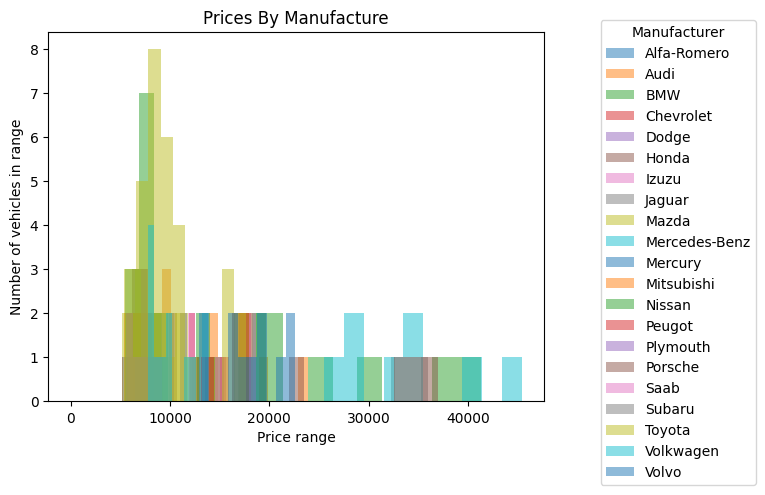

In [33]:
# create variables for each manufacture
A = df.loc[price_by_manufacture_df['make'] == 'alfa-romero', 'price']
B = df.loc[price_by_manufacture_df['make'] == 'audi', 'price']
C = df.loc[price_by_manufacture_df['make'] == 'bmw', 'price']
D = df.loc[price_by_manufacture_df['make'] == 'chevrolet', 'price']
E = df.loc[price_by_manufacture_df['make'] == 'dodge', 'price']
F = df.loc[price_by_manufacture_df['make'] == 'honda', 'price']
G = df.loc[price_by_manufacture_df['make'] == 'izuzu', 'price']
H = df.loc[price_by_manufacture_df['make'] == 'jaguar', 'price']
I = df.loc[price_by_manufacture_df['make'] == 'mazda', 'price']
J = df.loc[price_by_manufacture_df['make'] == 'mercedes-benz', 'price']
K = df.loc[price_by_manufacture_df['make'] == 'mercury', 'price']
L = df.loc[price_by_manufacture_df['make'] == 'mitsubishi', 'price']
M = df.loc[price_by_manufacture_df['make'] == 'nissan', 'price']
N = df.loc[price_by_manufacture_df['make'] == 'peugot', 'price']
O = df.loc[price_by_manufacture_df['make'] == 'plymouth', 'price']
P = df.loc[price_by_manufacture_df['make'] == 'porsche', 'price']
Q = df.loc[price_by_manufacture_df['make'] == 'saab', 'price']
R = df.loc[price_by_manufacture_df['make'] == 'subaru', 'price']
S = df.loc[price_by_manufacture_df['make'] == 'toyota', 'price']
T = df.loc[price_by_manufacture_df['make'] == 'volkswagen', 'price']
U = df.loc[price_by_manufacture_df['make'] == 'volvo', 'price']


#add histograms to one plot using variables.
plt.hist(A, alpha=0.5, label='Alfa-Romero')
plt.hist(B, alpha=0.5, label='Audi')
plt.hist(C, alpha=0.5, label='BMW')
plt.hist(D, alpha=0.5, label='Chevrolet')
plt.hist(E, alpha=0.5, label='Dodge')
plt.hist(F, alpha=0.5, label='Honda')
plt.hist(G, alpha=0.5, label='Izuzu')
plt.hist(H, alpha=0.5, label='Jaguar')
plt.hist(I, alpha=0.5, label='Mazda')
plt.hist(J, alpha=0.5, label='Mercedes-Benz')
plt.hist(K, alpha=0.5, label='Mercury')
plt.hist(L, alpha=0.5, label='Mitsubishi')
plt.hist(M, alpha=0.5, label='Nissan')
plt.hist(N, alpha=0.5, label='Peugot')
plt.hist(O, alpha=0.5, label='Plymouth')
plt.hist(P, alpha=0.5, label='Porsche')
plt.hist(Q, alpha=0.5, label='Saab')
plt.hist(R, alpha=0.5, label='Subaru')
plt.hist(S, alpha=0.5, label='Toyota')
plt.hist(T, alpha=0.5, label='Volkwagen')
plt.hist(U, alpha=0.5, label='Volvo')

#add plot title and axis labels
plt.locator_params(axis="y", integer=True, tight=True)
plt.title('Prices By Manufacture')
plt.xlabel('Price range')
plt.ylabel('Number of vehicles in range')
#add legend
plt.legend(title='Manufacturer',bbox_to_anchor=(1.1, 1.05))

#display plot
plt.show()

We can see here that Toyota is dominating this particular price area, as well as the over all availability within this dataset. Lets compare Toyota to the other competitors in there area of focus, those being, mazda, nissan and volkswagen, to see how there availability compares.

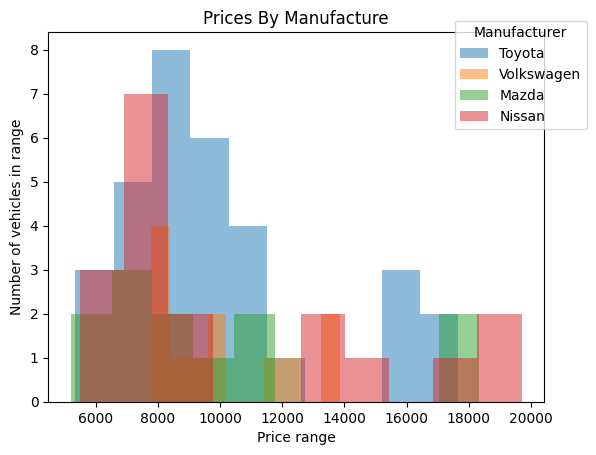

In [31]:
S = df.loc[price_by_manufacture_df['make'] == 'toyota', 'price']
T = df.loc[price_by_manufacture_df['make'] == 'volkswagen', 'price']
I = df.loc[price_by_manufacture_df['make'] == 'mazda', 'price']
M = df.loc[price_by_manufacture_df['make'] == 'nissan', 'price']

plt.hist(S, alpha=0.5, label='Toyota')
plt.hist(T, alpha=0.5, label='Volkswagen')
plt.hist(I, alpha=0.5, label='Mazda')
plt.hist(M, alpha=0.5, label='Nissan')


plt.locator_params(axis="y", integer=True,)
plt.title('Prices By Manufacture')
plt.xlabel('Price range')
plt.ylabel('Number of vehicles in range')

#add legend
plt.legend(title='Manufacturer',bbox_to_anchor=(1.1, 1.05))

#display plot
plt.show()


As you can see here, all three manufactuers have vehicles available between six and ten thousand pounds however, Toyota, mazda and missan all have the cheaper options, with cars available under 8000 pounds. However considering that Volkswagen, as we saw before, tends to be the more economical vehicle for its over all size, you may consider that the offset in initial outlay is worth the extra when you consider the savings over the lifetime of the vehicle. For this reason I would conclude that Volkswagen is the manufacture who offers the most value for money accross the life of its products. 
However, the other three manufactures do seem to have more choice available and are not too far behind in the race for over all economy. So as an alternative, if range of choice is your priority then it wouldn't be bad advise to suggest looking at Toyota, Nissan or a Mazda as they all offer adiquate fuel economy for the vehicles size and have cheaper options available.